In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
df= pd.read_excel("WHRFinal.xlsx")

In [3]:
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Years covered: {df['Year'].min()} - {df['Year'].max()}")
print(f"Number of countries: {df['Country'].nunique()}")

Dataset Overview:
Shape: (1509, 11)
Columns: ['Country', 'Year', 'Region', 'Happiness Rank', 'Happiness Score', 'GDP', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']
Years covered: 2015 - 2024
Number of countries: 177


In [4]:
df.head()

Country  Year         Region  Happiness Rank  Happiness Score  \
0  Afghanistan  2015  Southern Asia             153            3.575   
1  Afghanistan  2016  Southern Asia             154            3.360   
2  Afghanistan  2017  Southern Asia             141            3.794   
3  Afghanistan  2018  Southern Asia             145            3.632   
4  Afghanistan  2019  Southern Asia             154            3.203   

        GDP  Social Support  Life Expectancy  Freedom  Generosity  Corruption  
0  0.319820        0.302850         0.303350  0.23414    0.365100    0.097190  
1  0.382270        0.110370         0.173440  0.16430    0.312680    0.071120  
2  0.401477        0.581543         0.180747  0.10618    0.311871    0.061158  
3  0.332000        0.537000         0.255000  0.08500    0.191000    0.036000  
4  0.350000        0.517000         0.361000  0.00000    0.158000    0.025000

In [5]:
# Basic data exploration
print("\n=== DATA QUALITY ASSESSMENT ===")
print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
numeric_cols = ['Happiness Rank', 'Happiness Score', 'GDP', 'Social Support', 
                'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']
df[numeric_cols].describe()


=== DATA QUALITY ASSESSMENT ===

Missing Values:
Country            0
Year               0
Region             0
Happiness Rank     0
Happiness Score    0
GDP                0
Social Support     0
Life Expectancy    2
Freedom            1
Generosity         0
Corruption         1
dtype: int64

Data Types:
Country             object
Year                 int64
Region              object
Happiness Rank       int64
Happiness Score    float64
GDP                float64
Social Support     float64
Life Expectancy    float64
Freedom            float64
Generosity         float64
Corruption         float64
dtype: object

Basic Statistics:


Happiness Rank  Happiness Score         GDP  Social Support  \
count     1509.000000      1509.000000  1509.00000     1509.000000   
mean        76.343274         5.453958     1.04731        1.073303   
std         43.954614         1.123006     0.45614        0.344047   
min          1.000000         1.364000     0.00000        0.000000   
25%         38.000000         4.605000     0.74036        0.860000   
50%         76.000000         5.477000     1.06800        1.102000   
75%        114.000000         6.293000     1.36500        1.343133   
max        158.000000         7.842000     2.20900        1.840000   

       Life Expectancy      Freedom   Generosity   Corruption  
count      1507.000000  1508.000000  1509.000000  1508.000000  
mean          0.580338     0.480013     0.188299     0.133628  
std           0.242602     0.181469     0.112133     0.112847  
min           0.000000     0.000000     0.000000     0.000000  
25%           0.403530     0.371000     0.107050     0.057471  
50%           0.606000     0.487000     0.172668     0.099772  
75%           0.776000     0.597000     0.246000     0.170250  
max           1.141000     1.018000     0.838075     0.587000

In [6]:
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [7]:
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [8]:
print(f"\nRegional Distribution:")
print(df['Region'].value_counts())


Regional Distribution:
Region
Sub-Saharan Africa                 374
Central and Eastern Europe         284
Latin America and Caribbean        211
Western Europe                     206
Middle East and Northern Africa    178
Southeastern Asia                   89
Southern Asia                       66
Eastern Asia                        61
Australia and New Zealand           20
North America                       20
Name: count, dtype: int64



=== TEMPORAL TRENDS ANALYSIS ===


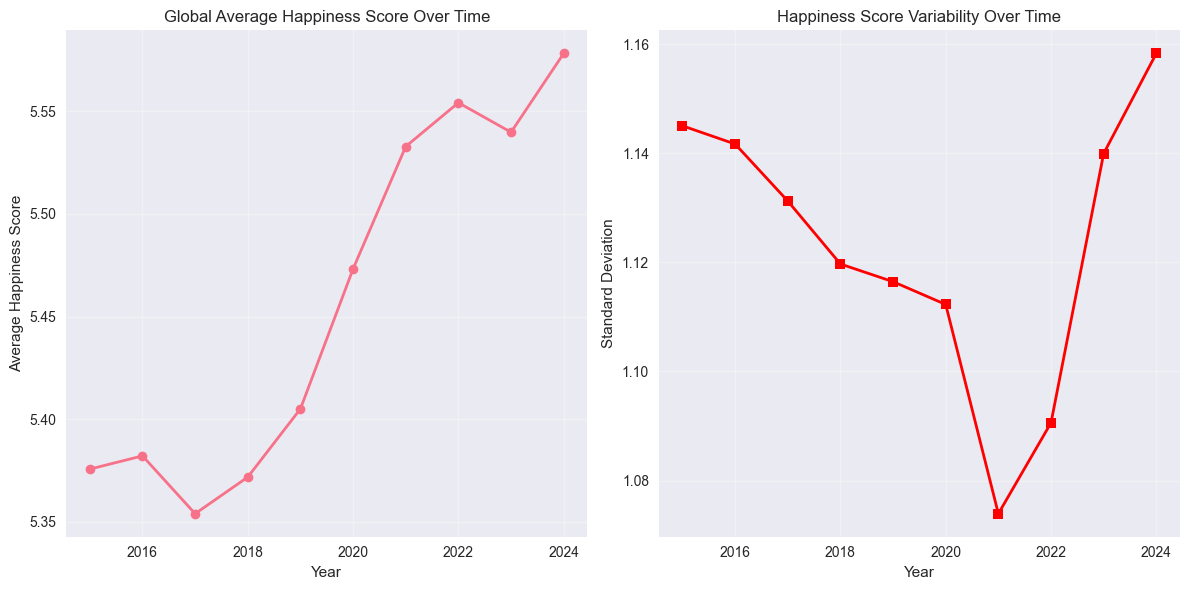

In [9]:
print("\n=== TEMPORAL TRENDS ANALYSIS ===")

# Average happiness score by year
yearly_happiness = df.groupby('Year')['Happiness Score'].agg(['mean', 'std', 'count']).reset_index()
yearly_happiness.columns = ['Year', 'Mean_Happiness', 'Std_Happiness', 'Country_Count']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(yearly_happiness['Year'], yearly_happiness['Mean_Happiness'], marker='o', linewidth=2)
plt.title('Global Average Happiness Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(yearly_happiness['Year'], yearly_happiness['Std_Happiness'], marker='s', color='red', linewidth=2)
plt.title('Happiness Score Variability Over Time')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

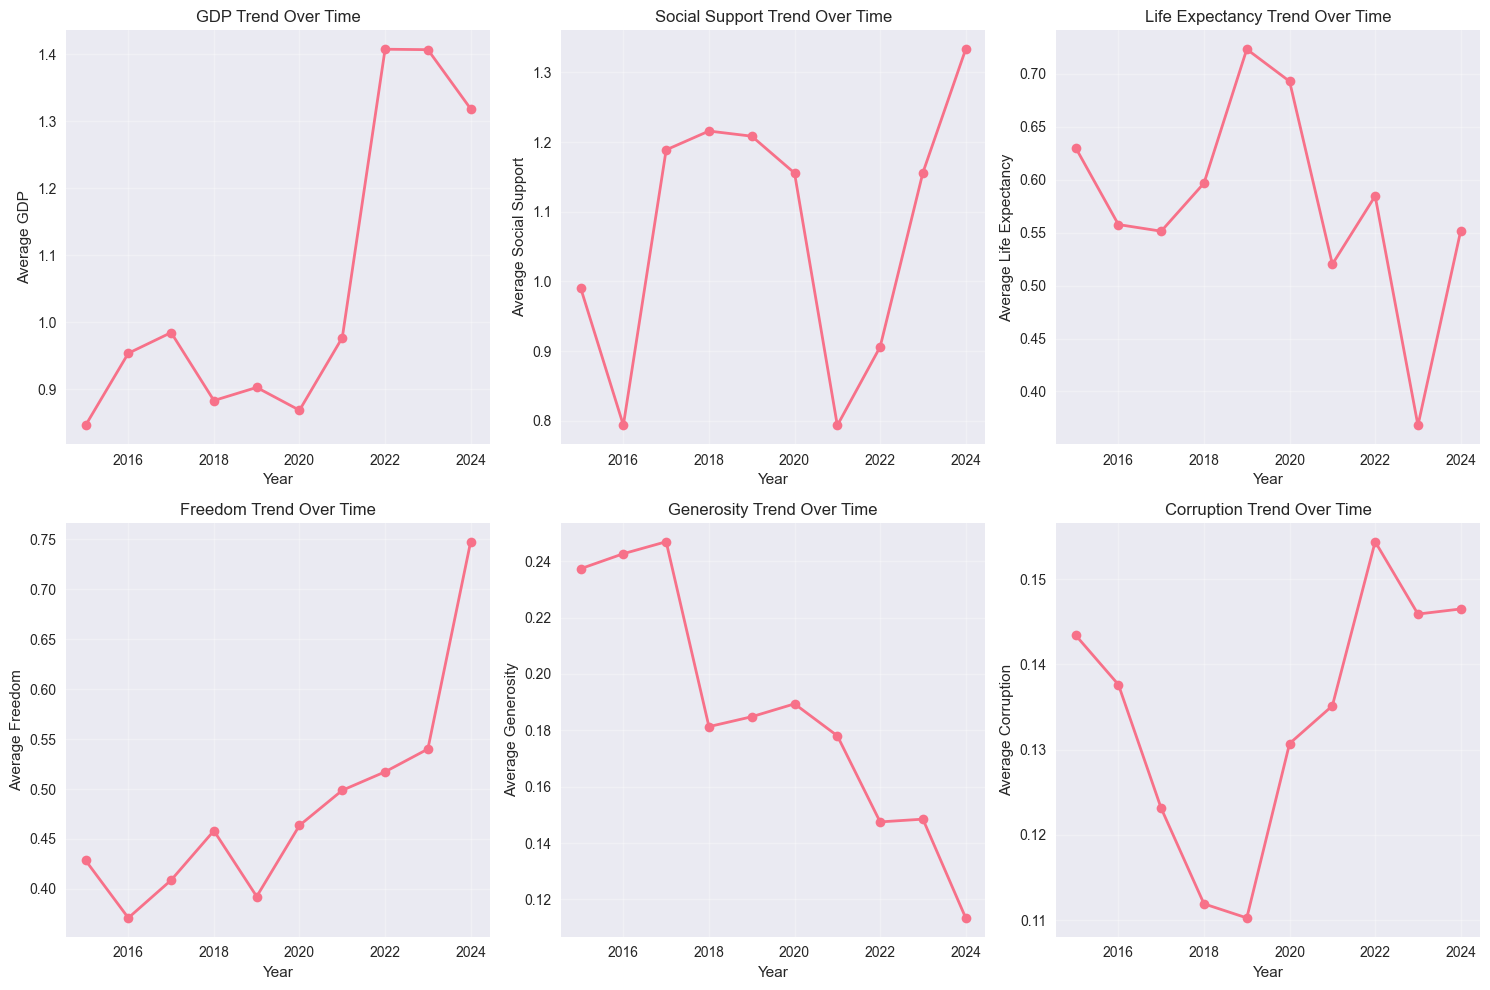

In [10]:
# Factor trends over time
factors = ['GDP', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']
yearly_factors = df.groupby('Year')[factors].mean().reset_index()

plt.figure(figsize=(15, 10))
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 3, i)
    plt.plot(yearly_factors['Year'], yearly_factors[factor], marker='o', linewidth=2)
    plt.title(f'{factor} Trend Over Time')
    plt.xlabel('Year')
    plt.ylabel(f'Average {factor}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== CORRELATION ANALYSIS ===


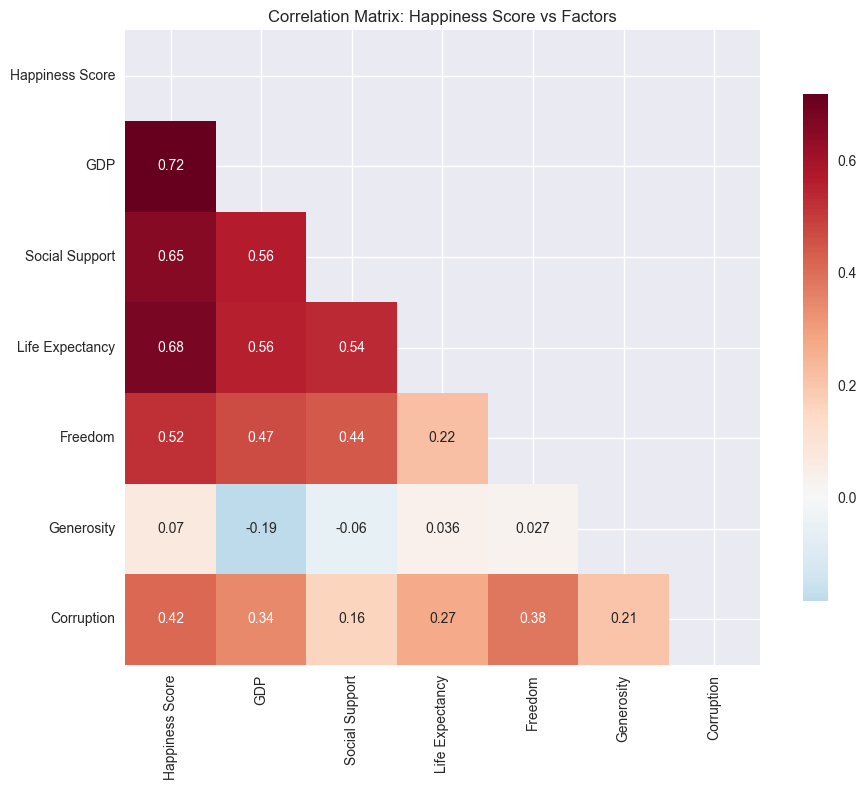

In [11]:
# Correlation analysis
print("\n=== CORRELATION ANALYSIS ===")

# Calculate correlation matrix
correlation_matrix = df[['Happiness Score'] + factors].corr()
# numpy.triu(m, k=0)==> Upper triangle of an array.

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Happiness Score vs Factors')
plt.tight_layout()
plt.show()

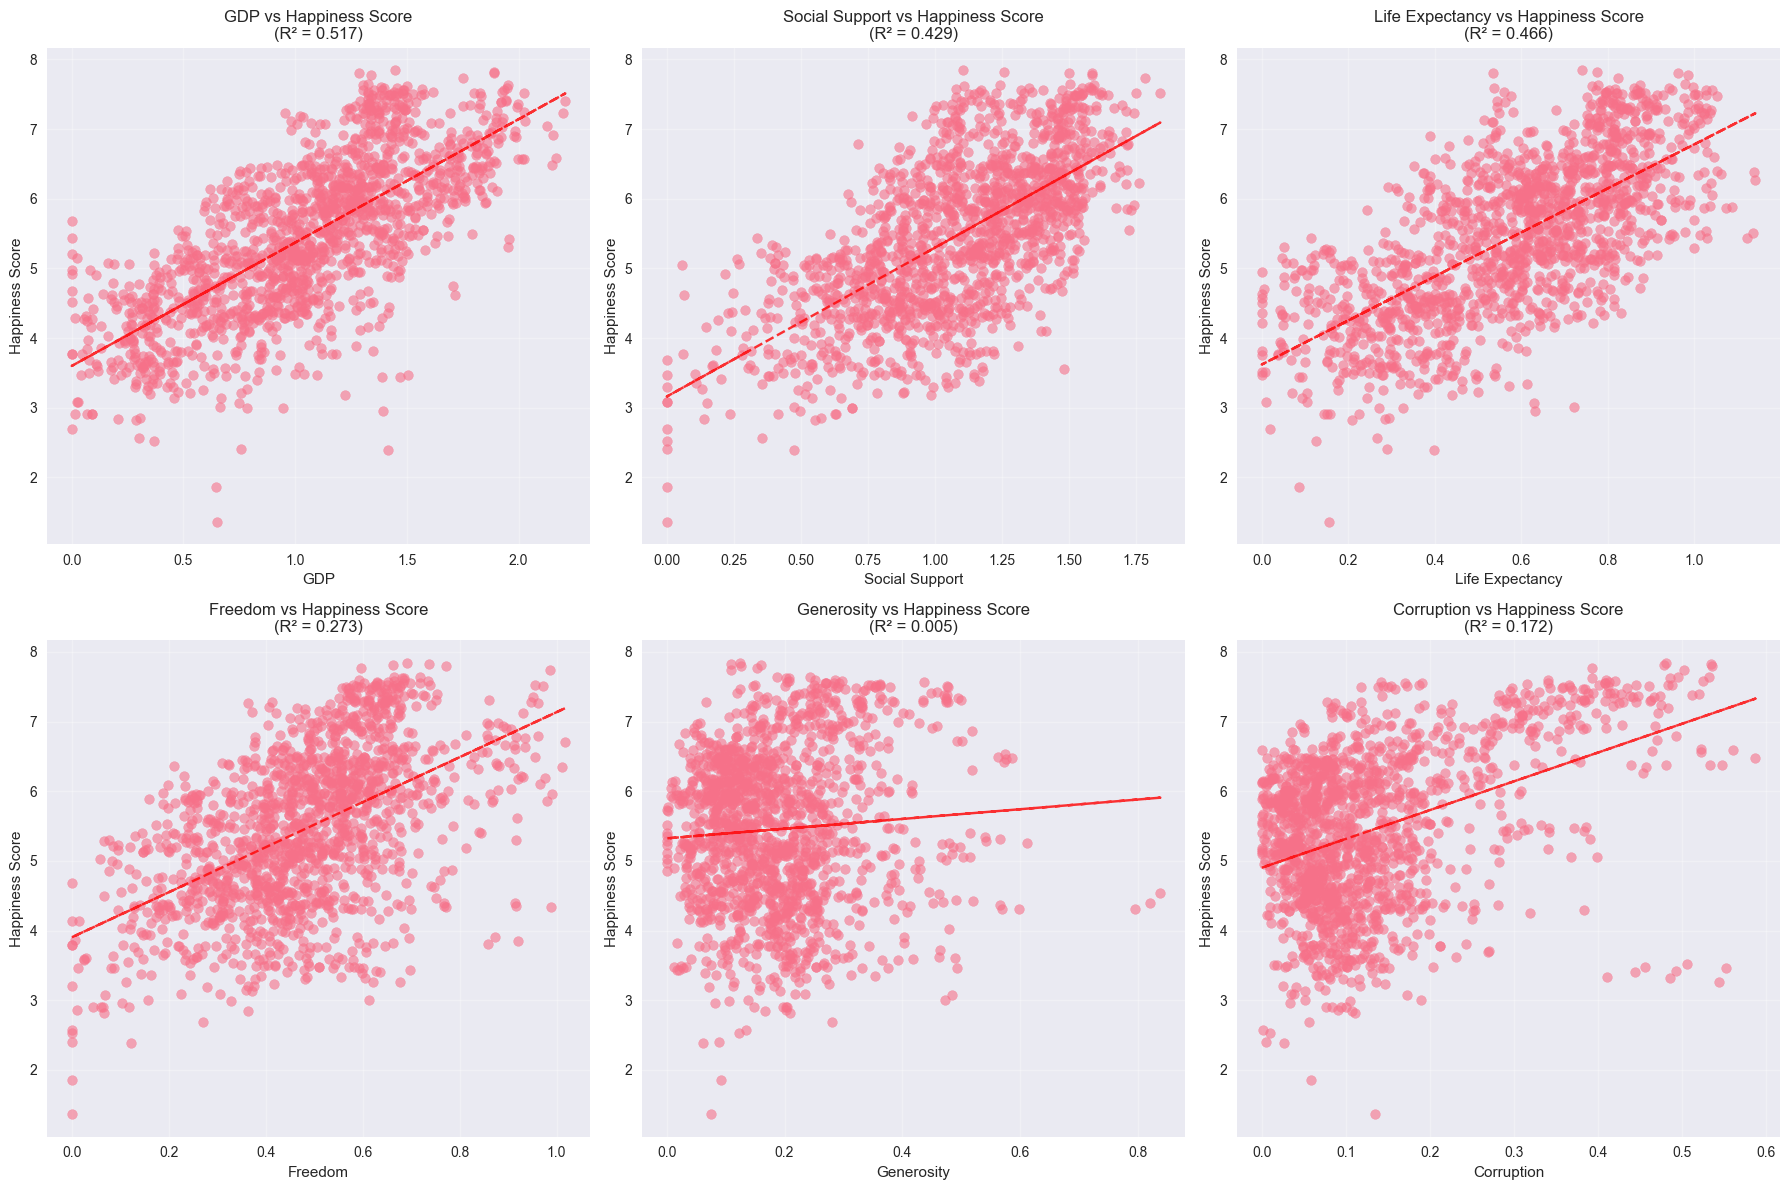

In [12]:
plt.figure(figsize=(18, 12)) 
for i, factor in enumerate(factors, 1): 
    plt.subplot(2, 3, i) 
    plt.scatter(df[factor], df['Happiness Score'], alpha=0.6) 
    # Add trend line 
    z = np.polyfit(df[factor], df['Happiness Score'], 1) 
    p = np.poly1d(z) 
    plt.plot(df[factor], p(df[factor]), "r--", alpha=0.8) 
    # Calculate R-squared 
    correlation = df[factor].corr(df['Happiness Score']) 
    r_squared = correlation**2 
    plt.xlabel(factor) 
    plt.ylabel('Happiness Score') 
    plt.title(f'{factor} vs Happiness Score\n(R² = {r_squared:.3f})')
    plt.grid(True, alpha=0.3) 
plt.tight_layout() 
plt.show()

In [13]:
# Average happiness by region
regional_stats = df.groupby('Region').agg({
    'Happiness Score': ['mean', 'std', 'count'],
    'GDP': 'mean',
    'Social Support': 'mean',
    'Life Expectancy': 'mean',
    'Freedom': 'mean',
    'Generosity': 'mean',
    'Corruption': 'mean'
}).round(3)


=== REGIONAL ANALYSIS ===
Regional Statistics:
                            Region  Happiness Score_mean  Happiness Score_std  \
0        Australia and New Zealand                 7.222                0.112   
1       Central and Eastern Europe                 5.634                0.608   
2                     Eastern Asia                 5.751                0.454   
3      Latin America and Caribbean                 6.021                0.639   
4  Middle East and Northern Africa                 5.267                1.047   
5                    North America                 7.068                0.204   
6                Southeastern Asia                 5.398                0.739   
7                    Southern Asia                 4.413                0.872   
8               Sub-Saharan Africa                 4.300                0.638   
9                   Western Europe                 6.822                0.683   

   Happiness Score_count  GDP_mean  Social Support_mean  Lif

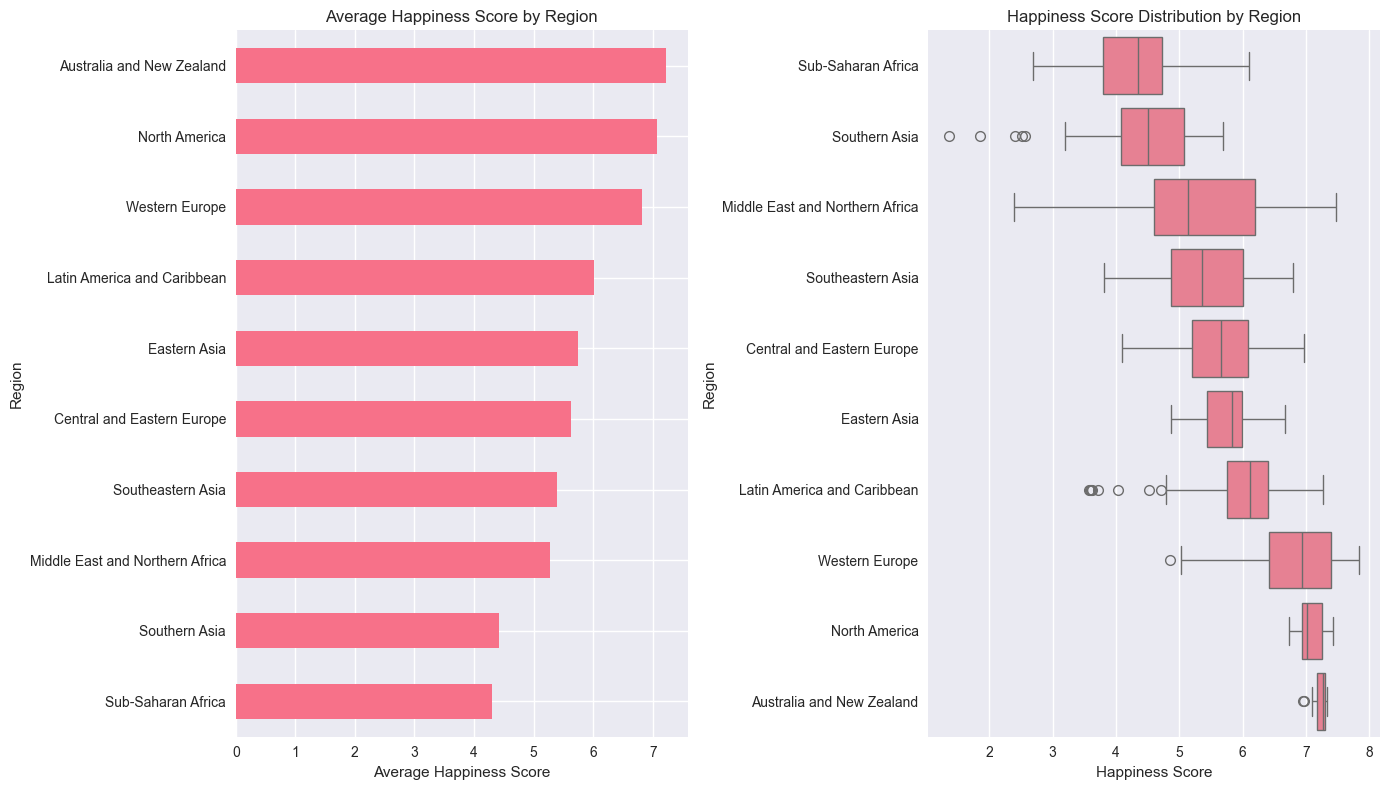

In [14]:
print("\n=== REGIONAL ANALYSIS ===")

regional_stats.columns = ['_'.join(col).strip() for col in regional_stats.columns.values]
regional_stats = regional_stats.reset_index()

print("Regional Statistics:")
print(regional_stats)

# Visualize regional happiness
plt.figure(figsize=(14, 8))
regional_happiness = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=True)

plt.subplot(1, 2, 1)
regional_happiness.plot(kind='barh')
plt.title('Average Happiness Score by Region')
plt.xlabel('Average Happiness Score')

# Regional distribution plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Region', x='Happiness Score', order=regional_happiness.index)
plt.title('Happiness Score Distribution by Region')
plt.xlabel('Happiness Score')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

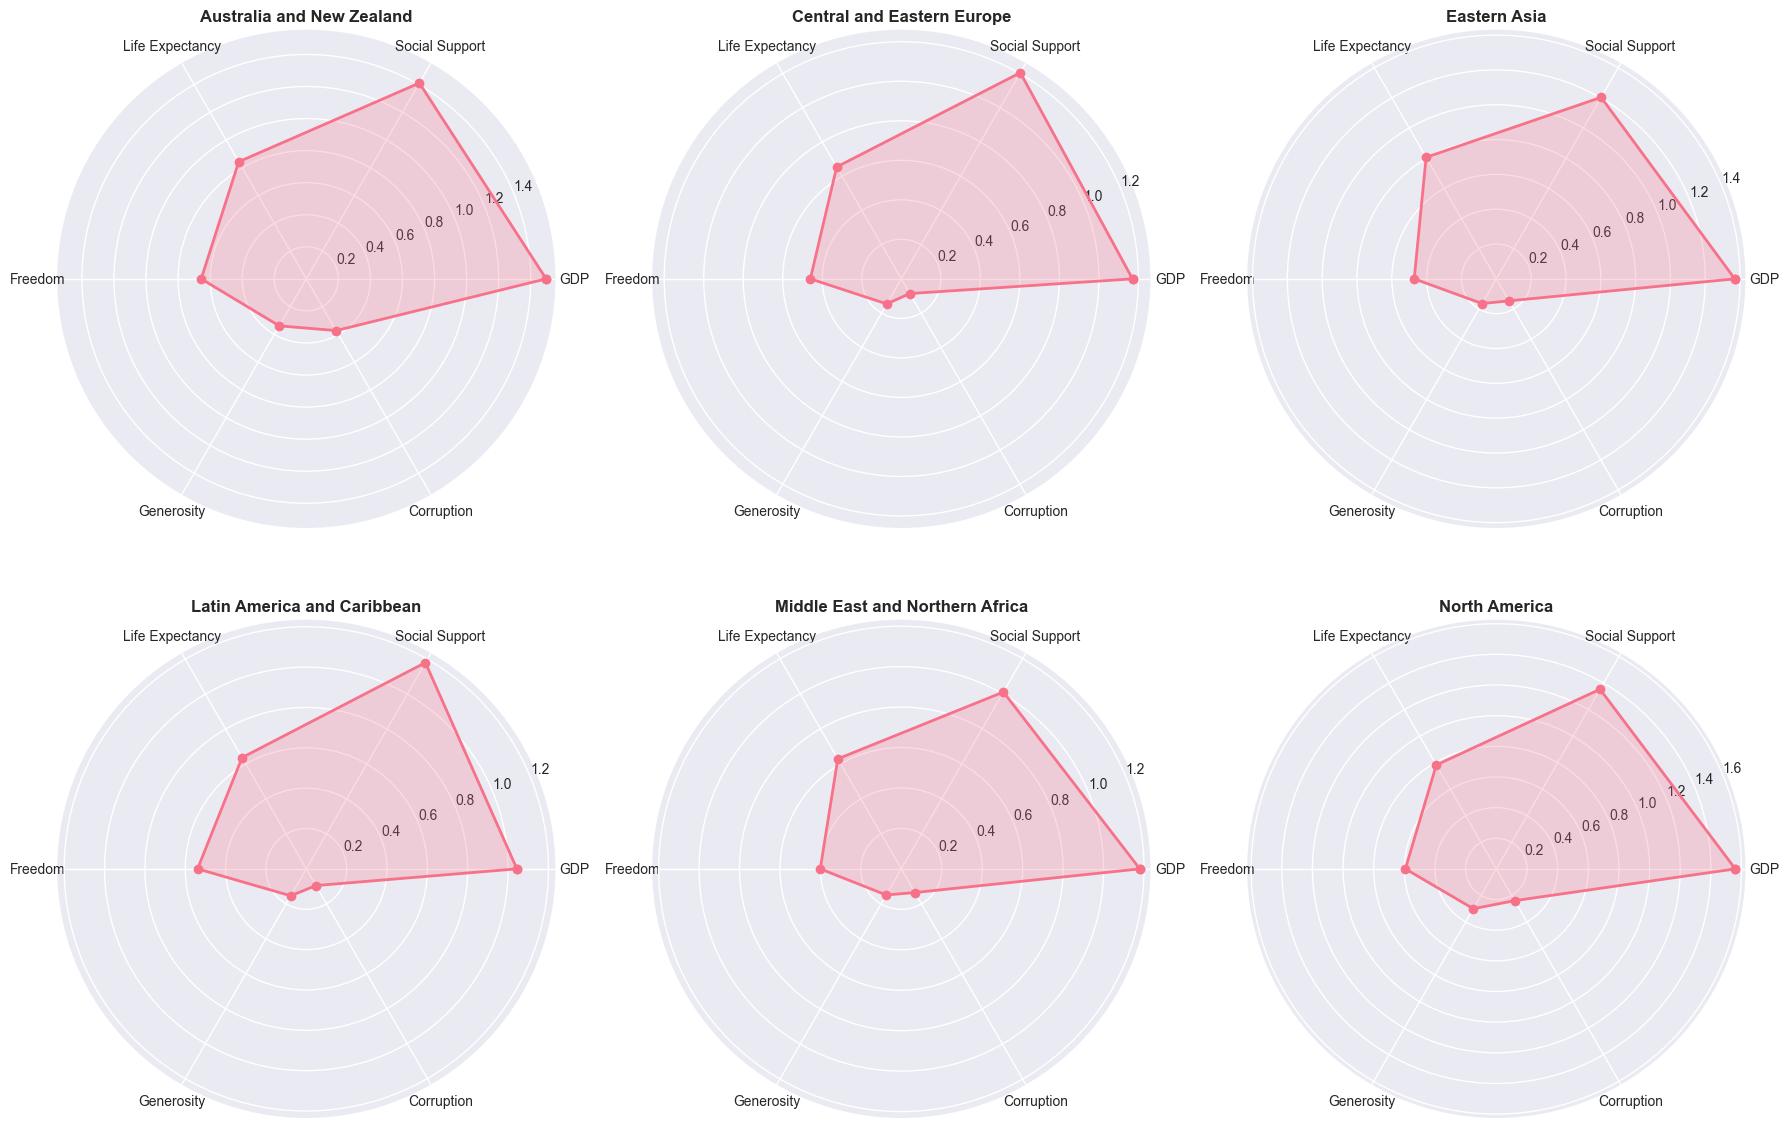

In [15]:
plt.figure(figsize=(15, 10))
regional_factors = df.groupby('Region')[factors].mean()

# Create radar chart data
regions_to_plot = regional_factors.index[:6]  # Top 6 regions
angles = np.linspace(0, 2 * np.pi, len(factors), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw=dict(projection='polar'))
axes = axes.flatten()

for i, region in enumerate(regions_to_plot):
    ax = axes[i]
    values = regional_factors.loc[region].tolist()
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, label=region)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(factors)
    ax.set_title(f'{region}', size=12, weight='bold')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [16]:
# Top and bottom performers analysis
print("\n=== TOP AND BOTTOM PERFORMERS ===")

# Get latest year data for ranking
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year].copy()

# Top 10 happiest countries
top_10 = latest_data.nlargest(10, 'Happiness Score')[['Country', 'Happiness Score'] + factors]
print("Top 10 Happiest Countries (Latest Year):")
print(top_10)

# Bottom 10 countries
bottom_10 = latest_data.nsmallest(10, 'Happiness Score')[['Country', 'Happiness Score'] + factors]
print("\nBottom 10 Countries (Latest Year):")
print(bottom_10)


=== TOP AND BOTTOM PERFORMERS ===
Top 10 Happiest Countries (Latest Year):
          Country  Happiness Score    GDP  Social Support  Life Expectancy  \
431       Finland            7.736  1.749           1.783            0.824   
357       Denmark            7.521  1.825           1.748            0.820   
564       Iceland            7.515  1.799           1.840            0.873   
1290       Sweden            7.345  1.783           1.698            0.889   
976   Netherlands            7.306  1.822           1.667            0.844   
316    Costa Rica            7.274  1.492           1.600            0.680   
1032       Norway            7.262  1.902           1.711            0.863   
624        Israel            7.234  1.695           1.743            0.824   
798    Luxembourg            7.122  2.028           1.558            0.864   
889        Mexico            6.979  1.435           1.504            0.550   

      Freedom  Generosity  Corruption  
431     0.986       0.110

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Afghanistan'),
  Text(1, 0, 'Sierra Leone'),
  Text(2, 0, 'Lebanon'),
  Text(3, 0, 'Malawi'),
  Text(4, 0, 'Zimbabwe'),
  Text(5, 0, 'Botswana'),
  Text(6, 0, 'DR Congo'),
  Text(7, 0, 'Yemen'),
  Text(8, 0, 'Comoros'),
  Text(9, 0, 'Lesotho')])

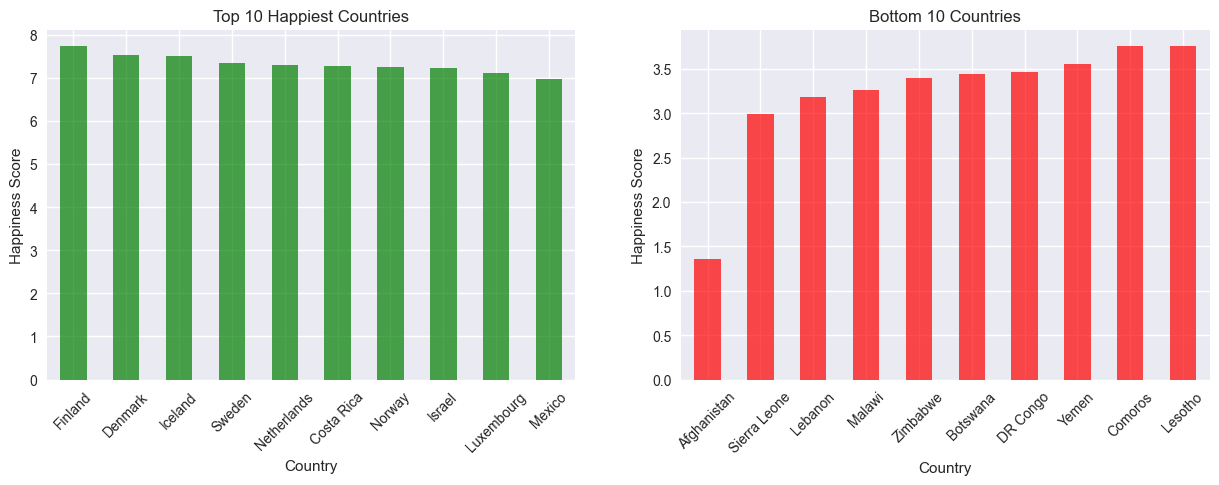

In [17]:
# Visualize top performers
plt.figure(figsize=(15, 10))

# Top 10 countries bar chart
plt.subplot(2, 2, 1)
top_10_plot = top_10.set_index('Country')['Happiness Score']
top_10_plot.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 10 Happiest Countries')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)

# Bottom 10 countries bar chart
plt.subplot(2, 2, 2)
bottom_10_plot = bottom_10.set_index('Country')['Happiness Score']
bottom_10_plot.plot(kind='bar', color='red', alpha=0.7)
plt.title('Bottom 10 Countries')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)


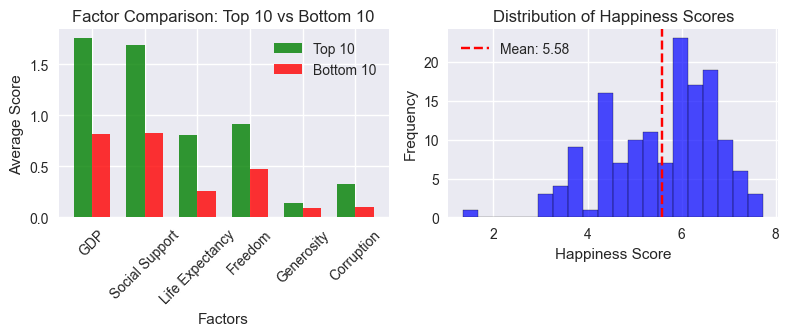

In [18]:
plt.subplot(2, 2, 3)
top_avg = top_10[factors].mean()
bottom_avg = bottom_10[factors].mean()
x = np.arange(len(factors))
width = 0.35

plt.bar(x - width/2, top_avg, width, label='Top 10', alpha=0.8, color='green')
plt.bar(x + width/2, bottom_avg, width, label='Bottom 10', alpha=0.8, color='red')

plt.xlabel('Factors')
plt.ylabel('Average Score')
plt.title('Factor Comparison: Top 10 vs Bottom 10')
plt.xticks(x, factors, rotation=45)
plt.legend()

# Happiness score distribution
plt.subplot(2, 2, 4)
plt.hist(latest_data['Happiness Score'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(latest_data['Happiness Score'].mean(), color='red', linestyle='--', 
            label=f'Mean: {latest_data["Happiness Score"].mean():.2f}')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Statistical significance testing
print("\n=== STATISTICAL SIGNIFICANCE TESTING ===")

# Test if regional differences are significant
from scipy.stats import f_oneway

# Get happiness scores by region
regional_groups = [group['Happiness Score'].values for name, group in df.groupby('Region')]
f_stat, p_value = f_oneway(*regional_groups)

print(f"ANOVA test for regional differences:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significant regional differences: {'Yes' if p_value < 0.05 else 'No'}")

print("\nCorrelation Significance Tests:")
for factor in factors:
    corr_coef, p_val = stats.pearsonr(df[factor], df['Happiness Score'])
    print(f"{factor}: r = {corr_coef:.4f}, p = {p_val:.4f}")


=== STATISTICAL SIGNIFICANCE TESTING ===
ANOVA test for regional differences:
F-statistic: 259.7217
P-value: 0.0000
Significant regional differences: Yes

Correlation Significance Tests:
GDP: r = 0.7193, p = 0.0000
Social Support: r = 0.6549, p = 0.0000
Life Expectancy: r = 0.6824, p = 0.0000
Freedom: r = 0.5221, p = 0.0000
Generosity: r = 0.0696, p = 0.0068
Corruption: r = 0.4153, p = 0.0000



=== PRINCIPAL COMPONENT ANALYSIS ===


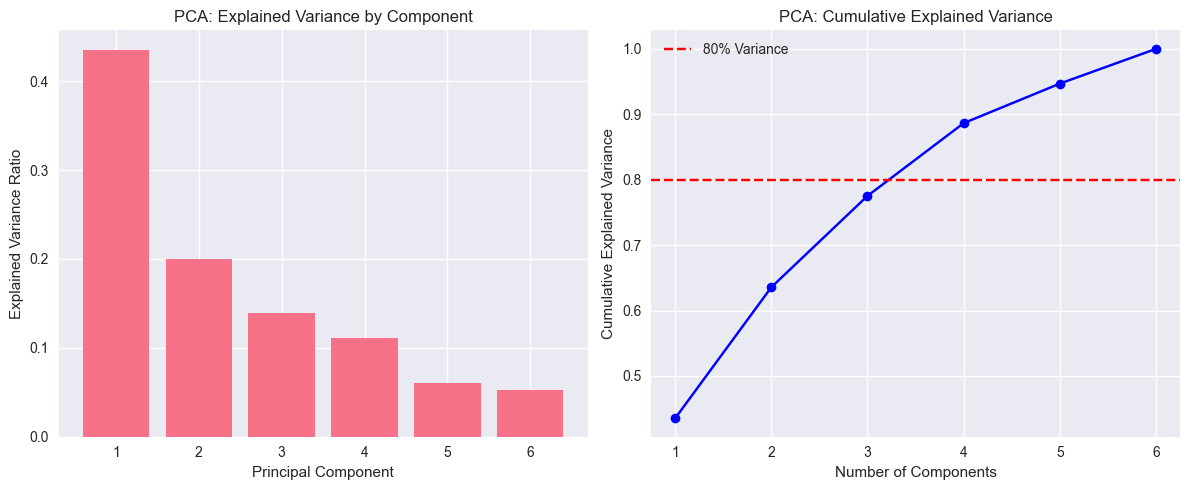

In [20]:
# Advanced Analysis: Principal Component Analysis
print("\n=== PRINCIPAL COMPONENT ANALYSIS ===")

# Prepare data for PCA
pca_data = df[factors].fillna(df[factors].median())
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(pca_data_scaled)

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance by Component')

plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Print component loadings
print("Principal Component Loadings:")
components_df = pd.DataFrame(
    pca.components_[:3].T,  # First 3 components
    columns=['PC1', 'PC2', 'PC3'],
    index=factors
)
print(components_df.round(3))

Principal Component Loadings:
                   PC1    PC2    PC3
GDP              0.521 -0.197 -0.051
Social Support   0.482 -0.197  0.244
Life Expectancy  0.454 -0.059  0.580
Freedom          0.422  0.152 -0.555
Generosity      -0.018  0.787  0.424
Corruption       0.333  0.525 -0.337



=== CLUSTERING ANALYSIS ===


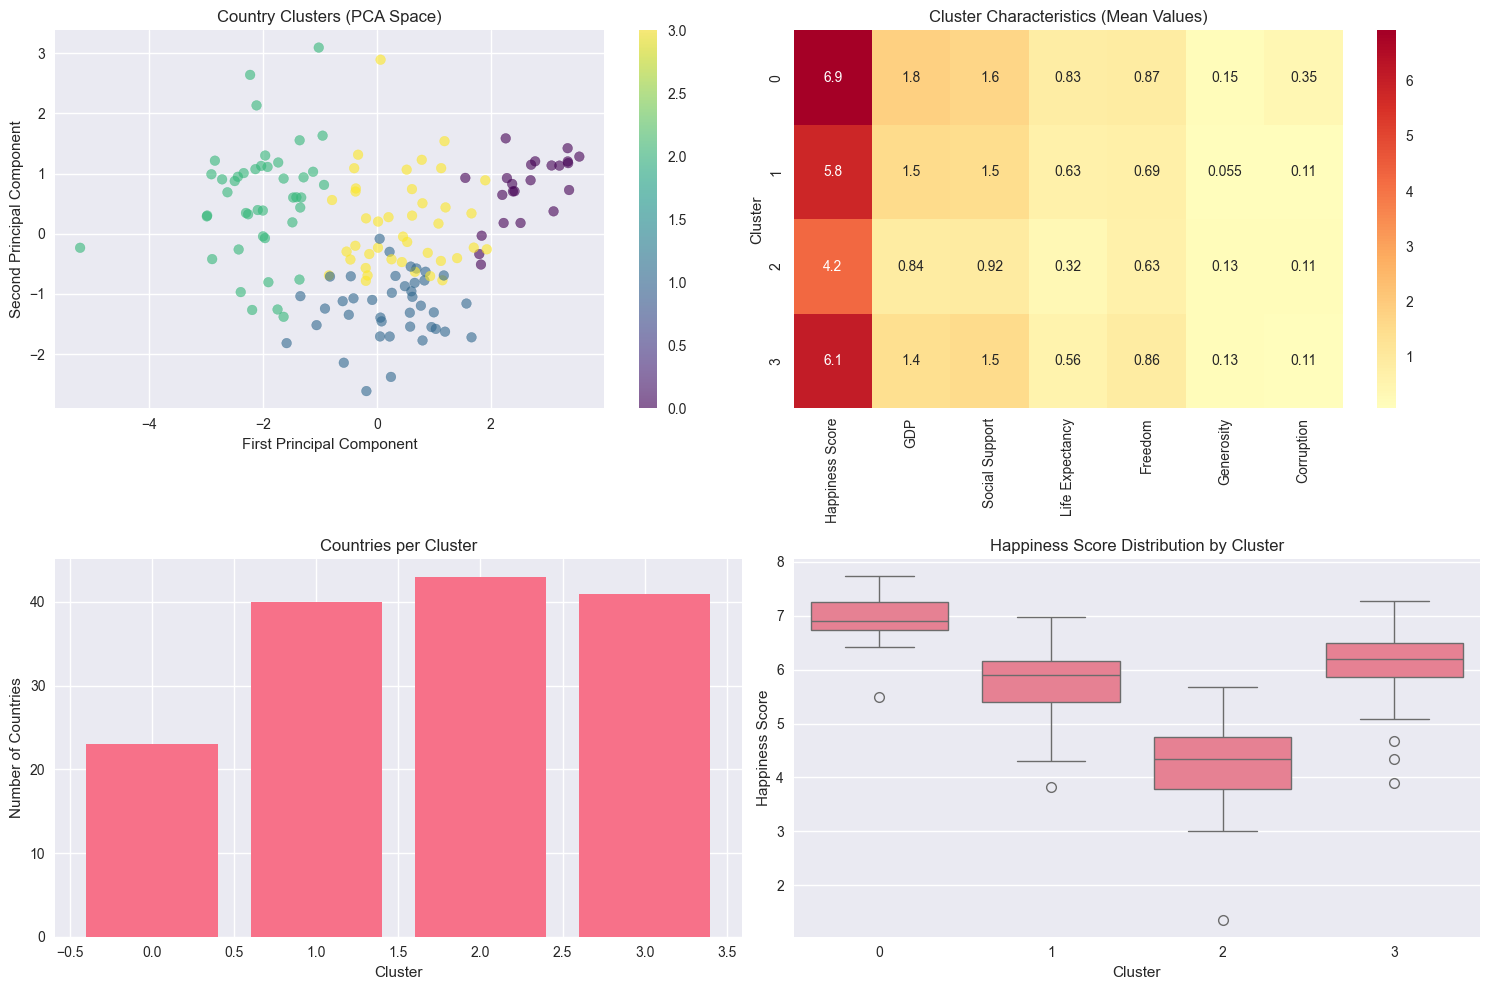

In [22]:
# Clustering Analysis
print("\n=== CLUSTERING ANALYSIS ===")

# Prepare data for clustering (using latest year only to avoid temporal bias)
latest_pca_data = latest_data[factors].fillna(latest_data[factors].median())
scaler_cluster = StandardScaler()
latest_pca_data_scaled = scaler_cluster.fit_transform(latest_pca_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(latest_pca_data_scaled)

# Perform PCA on latest data for visualization
pca_latest = PCA()
pca_result_latest = pca_latest.fit_transform(latest_pca_data_scaled)

# Add cluster labels to dataframe
df_clustered = latest_data.copy()
df_clustered['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(15, 10))

# Cluster visualization using first two principal components
plt.subplot(2, 2, 1)
scatter = plt.scatter(pca_result_latest[:, 0], pca_result_latest[:, 1], 
                     c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Country Clusters (PCA Space)')
plt.colorbar(scatter)

# Cluster characteristics
plt.subplot(2, 2, 2)
cluster_means = df_clustered.groupby('Cluster')[['Happiness Score'] + factors].mean()
sns.heatmap(cluster_means, annot=True, cmap='RdYlBu_r', center=0)
plt.title('Cluster Characteristics (Mean Values)')

# Countries by cluster
plt.subplot(2, 2, 3)
cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.title('Countries per Cluster')

# Happiness score by cluster
plt.subplot(2, 2, 4)
sns.boxplot(data=df_clustered, x='Cluster', y='Happiness Score')
plt.title('Happiness Score Distribution by Cluster')

plt.tight_layout()
plt.show()


In [23]:
# Print countries in each cluster
print("Countries by Cluster:")
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    countries = df_clustered[df_clustered['Cluster'] == cluster_id]['Country'].tolist()
    print(f"Cluster {cluster_id}: {', '.join(countries)}\n\n")

Countries by Cluster:
Cluster 0: Australia, Austria, Belgium, Canada, Denmark, Estonia, Finland, France, Germany, Hong Kong, Iceland, Ireland, Israel, Luxembourg, Netherlands, New Zealand, Norway, Singapore, Spain, Sweden, Switzerland, United Arab Emirates, United Kingdom


Cluster 1: Algeria, Argentina, Armenia, Azerbaijan, Bulgaria, Chile, China, Colombia, Croatia, Cyprus, Dominican Republic, Ecuador, Egypt, Gabon, Georgia, Greece, Hungary, Iraq, Italy, Japan, Jordan, Lithuania, Mauritius, Mexico, Montenegro, Panama, Peru, Poland, Portugal, Republic of Korea, Republic of Moldova, Romania, Russian, Slovakia, South Africa, State of Palestine, Taiwan Province of China, Tajikistan, Tunisia, Turkey


Cluster 2: Afghanistan, Bangladesh, Benin, Botswana, Burkina Faso, Cameroon, Chad, Comoros, Congo, Côte d’Ivoire, DR Congo, Eswatini, Ethiopia, Gambia, Ghana, Guinea, India, Kenya, Lebanon, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Morocco, Mozambique, Myanmar, Namibia, Nepal, N


=== LONGITUDINAL ANALYSIS ===


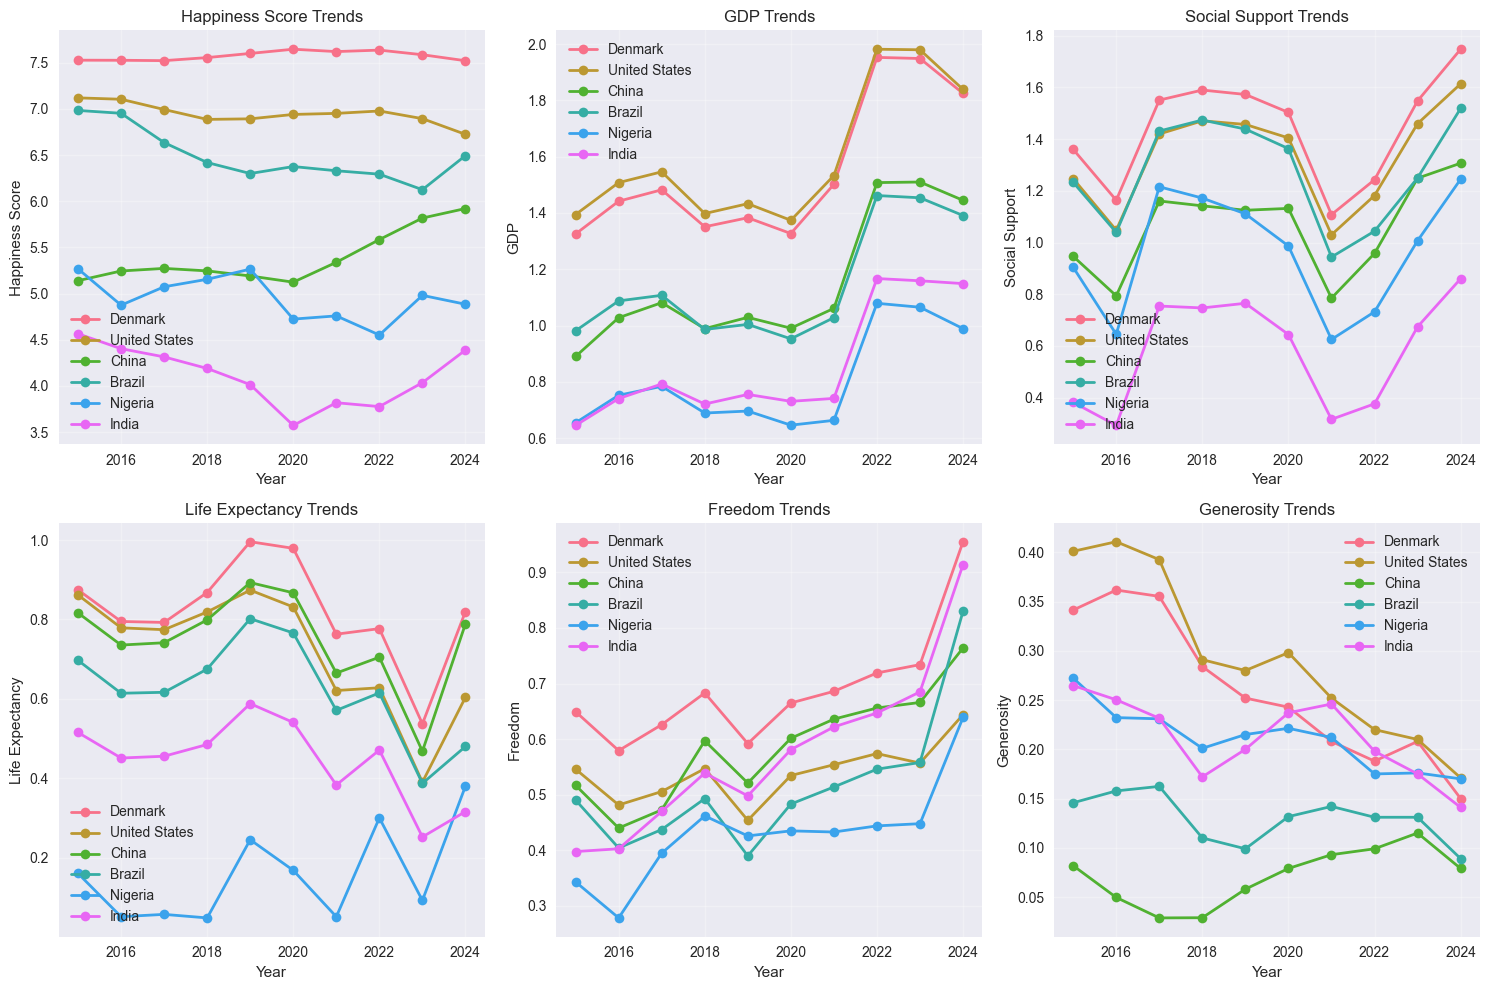

In [24]:
# Year-over-year analysis for specific countries
print("\n=== LONGITUDINAL ANALYSIS ===")

# Select a few interesting countries for trend analysis
interesting_countries = ['Denmark', 'United States', 'China', 'Brazil', 'Nigeria', 'India']
available_countries = [country for country in interesting_countries if country in df['Country'].values]

if available_countries:
    plt.figure(figsize=(15, 10))
    
    for i, factor in enumerate(['Happiness Score'] + factors[:5], 1):
        plt.subplot(2, 3, i)
        for country in available_countries:
            country_data = df[df['Country'] == country].sort_values('Year')
            if len(country_data) > 1:  # Only plot if we have multiple years
                plt.plot(country_data['Year'], country_data[factor], 
                        marker='o', label=country, linewidth=2)
        
        plt.xlabel('Year')
        plt.ylabel(factor)
        plt.title(f'{factor} Trends')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [25]:
# Model Performance Metrics
print("\n=== MODEL INSIGHTS ===")

# Simple linear regression for each factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print("Individual Factor R-squared with Happiness Score:")
for factor in factors:
    X = df[factor].values.reshape(-1, 1)
    y = df['Happiness Score'].values
    
    # Remove NaN values
    mask = ~(np.isnan(X.flatten()) | np.isnan(y))
    X_clean = X[mask]
    y_clean = y[mask]
    
    if len(X_clean) > 0:
        model = LinearRegression()
        model.fit(X_clean, y_clean)
        r2 = r2_score(y_clean, model.predict(X_clean))
        print(f"{factor}: R² = {r2:.4f}")

# Multiple linear regression
X_multi = df[factors].fillna(df[factors].median())
y_multi = df['Happiness Score'].fillna(df['Happiness Score'].median())

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)
r2_multi = r2_score(y_multi, model_multi.predict(X_multi))

print(f"\nMultiple Linear Regression R²: {r2_multi:.4f}")
print("Factor Coefficients:")
coef_df = pd.DataFrame({
    'Factor': factors,
    'Coefficient': model_multi.coef_,
    'Abs_Coefficient': np.abs(model_multi.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(coef_df)


=== MODEL INSIGHTS ===
Individual Factor R-squared with Happiness Score:
GDP: R² = 0.5174
Social Support: R² = 0.4289
Life Expectancy: R² = 0.4656
Freedom: R² = 0.2726
Generosity: R² = 0.0049
Corruption: R² = 0.1724

Multiple Linear Regression R²: 0.7288
Factor Coefficients:
            Factor  Coefficient  Abs_Coefficient
2  Life Expectancy     1.453956         1.453956
4       Generosity     1.088727         1.088727
3          Freedom     1.012486         1.012486
5       Corruption     0.959106         0.959106
0              GDP     0.814503         0.814503
1   Social Support     0.716046         0.716046


In [26]:
# Final Summary Statistics
print("\n=== SUMMARY INSIGHTS ===")
print(f"Dataset Summary:")
print(f"- Total observations: {len(df)}")
print(f"- Countries: {df['Country'].nunique()}")
print(f"- Years: {df['Year'].nunique()} ({df['Year'].min()}-{df['Year'].max()})")
print(f"- Average global happiness: {df['Happiness Score'].mean():.3f}")
print(f"- Happiness standard deviation: {df['Happiness Score'].std():.3f}")

print(f"\nKey Findings:")
print(f"- Strongest happiness predictor: {happiness_corr.index[1]} (r = {happiness_corr.iloc[1]:.3f})")
print(f"- Weakest happiness predictor: {happiness_corr.index[-1]} (r = {happiness_corr.iloc[-1]:.3f})")
print(f"- Happiest region: {regional_happiness.index[-1]}")
print(f"- Most variable region: {df.groupby('Region')['Happiness Score'].std().idxmax()}")

# Save processed data
df_clustered.to_csv('happiness_analysis_results.csv', index=False)
print("\nAnalysis complete! Results saved to 'happiness_analysis_results.csv'")


=== SUMMARY INSIGHTS ===
Dataset Summary:
- Total observations: 1509
- Countries: 177
- Years: 10 (2015-2024)
- Average global happiness: 5.454
- Happiness standard deviation: 1.123

Key Findings:


NameError: name 'happiness_corr' is not defined